In [1]:
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf

In [6]:
X_train = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])

Y_train = np.array([0, 0, 1, 1])

In [7]:
def shuffle_batch(X, Y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, Y_batch = X[batch_idx], Y[batch_idx]
        
        yield X_batch, Y_batch

In [57]:
metrics = {}

cols = ['# of Hidden Layers', '# of Neurons at HLs','Time Took', 'Training Accuracy', 'Training Loss']

# Fixed hyper-parameters
epochs = 200
batch_size = 2
learning_rate = 0.001

In [58]:
start = datetime.datetime.now()

n_hidden = 6
n_out = 2

tf.reset_default_graph()
tf.set_random_seed(1)
np.random.seed(2)

X = tf.placeholder(tf.float32, shape = (None, 2), name = "X")
Y = tf.placeholder(tf.int32, shape = (None), name = "Y")

with tf.name_scope("MLP"):
    hidden1 = tf.layers.dense(X, n_hidden, name = "hidden_1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden, name = "hidden_2", activation = tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_out, name = "output")
    y_prob = tf.nn.softmax(logits)
    
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = Y, logits = logits)
    loss = tf.reduce_mean(cross_entropy, name = "Loss")
    log_loss = -tf.math.log(loss)

with tf.name_scope("Train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('Eval'):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
his_acc = []
his_log_loss = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        print('\n  ----- Epoch ', epoch, ' ----\n')
        for X_batch, Y_batch in shuffle_batch(X_train, Y_train, batch_size):
            sess.run(training_op, feed_dict = {X: X_batch, Y: Y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_train, Y: Y_train})
        log_loss_train = log_loss.eval(feed_dict = {X: X_train, Y: Y_train})
        y_pred = sess.run(y_prob, feed_dict = {X: X_train})
        
        his_acc.append(acc_train)
        his_log_loss.append(log_loss_train)
        print('Train accuracy: ', acc_train)
        print('Train log_loss: ', log_loss_train)
        
end = datetime.datetime.now()
run_time = end - start

metrics['Model 1'] = [2, n_hidden, run_time, acc_train, log_loss_train]


  ----- Epoch  0  ----

Train accuracy:  0.25
Train log_loss:  0.33037952

  ----- Epoch  1  ----

Train accuracy:  0.25
Train log_loss:  0.33184898

  ----- Epoch  2  ----

Train accuracy:  0.25
Train log_loss:  0.33384243

  ----- Epoch  3  ----

Train accuracy:  0.25
Train log_loss:  0.3362526

  ----- Epoch  4  ----

Train accuracy:  0.25
Train log_loss:  0.3381952

  ----- Epoch  5  ----

Train accuracy:  0.25
Train log_loss:  0.3405099

  ----- Epoch  6  ----

Train accuracy:  0.25
Train log_loss:  0.34254643

  ----- Epoch  7  ----

Train accuracy:  0.25
Train log_loss:  0.34455657

  ----- Epoch  8  ----

Train accuracy:  0.25
Train log_loss:  0.34677687

  ----- Epoch  9  ----

Train accuracy:  0.25
Train log_loss:  0.34910876

  ----- Epoch  10  ----

Train accuracy:  0.25
Train log_loss:  0.3512257

  ----- Epoch  11  ----

Train accuracy:  0.25
Train log_loss:  0.3535142

  ----- Epoch  12  ----

Train accuracy:  0.25
Train log_loss:  0.35560417

  ----- Epoch  13  ----

T

Train log_loss:  0.5193223

  ----- Epoch  122  ----

Train accuracy:  0.75
Train log_loss:  0.52083784

  ----- Epoch  123  ----

Train accuracy:  0.75
Train log_loss:  0.5223236

  ----- Epoch  124  ----

Train accuracy:  0.75
Train log_loss:  0.5239208

  ----- Epoch  125  ----

Train accuracy:  0.75
Train log_loss:  0.525513

  ----- Epoch  126  ----

Train accuracy:  0.75
Train log_loss:  0.5270349

  ----- Epoch  127  ----

Train accuracy:  0.75
Train log_loss:  0.5287037

  ----- Epoch  128  ----

Train accuracy:  0.75
Train log_loss:  0.5304115

  ----- Epoch  129  ----

Train accuracy:  0.75
Train log_loss:  0.53199106

  ----- Epoch  130  ----

Train accuracy:  0.75
Train log_loss:  0.53365004

  ----- Epoch  131  ----

Train accuracy:  1.0
Train log_loss:  0.53539234

  ----- Epoch  132  ----

Train accuracy:  1.0
Train log_loss:  0.5369963

  ----- Epoch  133  ----

Train accuracy:  1.0
Train log_loss:  0.53863287

  ----- Epoch  134  ----

Train accuracy:  1.0
Train log_lo

In [59]:
metrics

{'Model 1': [2,
  6,
  datetime.timedelta(seconds=2, microseconds=140768),
  1.0,
  0.6740175]}

In [60]:
import matplotlib.pyplot as plt

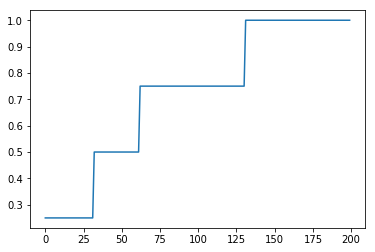

In [61]:
plt.plot(his_acc)

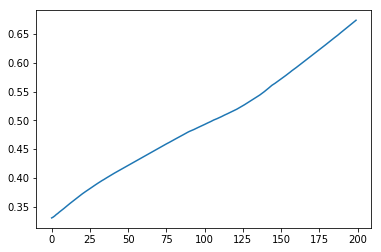

In [62]:
plt.plot(his_log_loss)

In [63]:
temp_out = np.argmax(y_pred, axis = 1)

temp_out == Y_train

array([ True,  True,  True,  True])